<a href="https://colab.research.google.com/github/Trading-com-Dados/desenvolvimento_interno/blob/main/MythBusters_do_Mercado_Financeiro_estrategias_e_timeframes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://tradingcomdados.com/images/logotipo/logotipo-trading-com-dados.svg" width="300" align="left"/>

---
# **MythBusters do Mercado Financeiro: estrategias e timeframes**
---

# **1) Bibliotecas utilizadas**

In [ ]:
!pip install ta
!pip install backtrader
!pip install quantstats
#!pip install MetaTrader5

In [ ]:
import numpy as np
import pandas as pd
import datetime
import pytz

#import yfinance as yf
#import MetaTrader5 as mt5
import ta
import backtrader as bt
import quantstats

import matplotlib
import matplotlib.pyplot as plt
#import plotly.graph_objects as go
#from plotly.subplots import make_subplots
%matplotlib inline

# **2. Ilustrações contexto**

## **2.1. Yahoo Finance - yfinance**

In [ ]:
## Importar os dados de cotações do Yahoo Finance

df_1WK = yf.download('BTC-USD', period='max', interval = '1wk')
df_1D = yf.download('BTC-USD', period='max', interval = '1d')
df_5min = yf.download('BTC-USD', start='2022-04-18', end = '2022-04-24', interval = '5m')
# df_1D = yf.download('BTC-USD', start='2021-01-01', end = '2021-03-31', interval = '1d')
df_1WK

## **2.2. Graficos**

In [ ]:
fig = make_subplots(rows=1, cols=2)

cotacoes_BTC_yf_fig_dia = df_1D[(df_1D.index == '2022-04-21')]
cotacoes_BTC_yf_fig_min = df_5min[(df_5min.index >= '2022-04-21 00:00')&(df_5min.index <= '2022-04-21 23:59')]

fig.add_trace(go.Candlestick(name="Bitcoin",x=cotacoes_BTC_yf_fig_dia.index, open=cotacoes_BTC_yf_fig_dia['Open'],high=cotacoes_BTC_yf_fig_dia['High'],
                             low=cotacoes_BTC_yf_fig_dia['Low'],close=cotacoes_BTC_yf_fig_dia['Close'],increasing_line_color= 'green', decreasing_line_color= 'red',showlegend=False), row=1,col=1)

fig.add_trace(go.Candlestick(name="Bitcoin",x=cotacoes_BTC_yf_fig_min.index, open=cotacoes_BTC_yf_fig_min['Open'],high=cotacoes_BTC_yf_fig_min['High'],
                             low=cotacoes_BTC_yf_fig_min['Low'],close=cotacoes_BTC_yf_fig_min['Close'],increasing_line_color= 'green', decreasing_line_color= 'red',showlegend=False), row=1,col=2)

fig.update_traces(line_width=3)

fig.update_layout(xaxis_rangeslider_visible=False,xaxis2_rangeslider_visible=False,title_text='',template = 'simple_white',margin=dict(l=20, r=20, t=20, b=20), 
                  paper_bgcolor="#f7f8fa",width=800,height=400,font=dict(family="Arial",size=18,color="black"),yaxis=dict(range=['40000', '43000']),yaxis2=dict(range=['40000', '43000']))

fig.show()

In [ ]:
cotacoes_BTC_yf_fig = df_1D[(df_1D.index > '2020-12-16') & (df_1D.index <= '2021-04-18')]

fig = go.Figure(data=[go.Candlestick(go.Candlestick(name='Bitcoin_USD', x=cotacoes_BTC_yf_fig.index, open=cotacoes_BTC_yf_fig['Open'],high=cotacoes_BTC_yf_fig['High'],
                                                    low=cotacoes_BTC_yf_fig['Low'],close=cotacoes_BTC_yf_fig['Close'],increasing_line_color= 'green', decreasing_line_color= 'red'))])

fig.update_traces(line_width=1)
fig.update_yaxes(title_text="<b> Bitcoin USD")
fig.update_layout(xaxis_rangeslider_visible=False,title_text='',template = 'simple_white',margin=dict(l=20, r=20, t=20, b=20), paper_bgcolor="#f7f8fa",width=1000,height=400,
                  font=dict(family="Arial",size=20,color="black"),
                  #xaxis=dict(range=['2021-10-18', '2022-04-21'])
                  )

fig.show()

# **3. Criar o dataset**

## 3.1. Carregar banco de dados excel obtidos do MT5 com Jupyter

In [ ]:
data_WIN_1d = pd.read_excel('/content/WINFUT_1d_mt5.xlsx')
data_WIN_1h = pd.read_excel('/content/WINFUT_1h_mt5.xlsx')
data_WIN_15m = pd.read_excel('/content/WINFUT_15m_mt5.xlsx')
data_WIN_05m = pd.read_excel('/content/WINFUT_05m_mt5.xlsx')
#data_WIN_01m = pd.read_excel('/content/WINFUT_01m_mt5.xlsx')

In [ ]:
#data_WDO_1d = pd.read_excel('/content/WDOFUT_1d_mt5.xlsx')
#data_WDO_1h = pd.read_excel('/content/WDOFUT_1h_mt5.xlsx')
#data_WDO_15m = pd.read_excel('/content/WDOFUT_15m_mt5.xlsx')
#data_WDO_05m = pd.read_excel('/content/WDOFUT_05m_mt5.xlsx')
#data_WDO_01m = pd.read_excel('/content/WDOFUT_01m_mt5.xlsx')

In [ ]:
#data_WIN_1d = pd.read_excel('C:/Users/jamir/Documents/GitHub/redes-sociais/Mythbusters/WINFUT_1d_mt5.xlsx')
#data_WIN_1d

In [ ]:
data_WIN_1d = data_WIN_1d.rename(columns={'time':'Date','open':'Open','high':'High','low':'Low','close':'Close','real_volume':'Volume'})
data_WIN_1d.index = data_WIN_1d['Date']
data_WIN_1d = data_WIN_1d.drop(['tick_volume','spread'],axis=1)
data_WIN_1d

,Date,Open,High,Low,Close,Volume
Date,,,,,,
2017-04-13,2017-04-13,82929,83294,81597,81680,948628
2017-04-17,2017-04-17,82007,83928,81898,83928,866786
2017-04-18,2017-04-18,83217,84088,82846,83320,992737
2017-04-19,2017-04-19,83576,83935,82103,82270,1052395
2017-04-20,2017-04-20,82808,83365,82295,82782,1063400
...,...,...,...,...,...,...
2022-04-22,2022-04-22,114500,114640,112240,112890,14064818
2022-04-25,2022-04-25,111335,112860,110825,112400,16888715
2022-04-26,2022-04-26,112085,112100,109210,109235,14773063


In [ ]:
data_WIN_1h = data_WIN_1h.rename(columns={'time':'Date','open':'Open','high':'High','low':'Low','close':'Close','real_volume':'Volume'})
data_WIN_1h.index = data_WIN_1h['Date']
data_WIN_1h = data_WIN_1h.drop(['tick_volume','spread'],axis=1)
data_WIN_1h

,Date,Open,High,Low,Close,Volume
Date,,,,,,
2017-04-13 09:00:00,2017-04-13 09:00:00,82929,82929,82462,82615,76084
2017-04-13 10:00:00,2017-04-13 10:00:00,82615,83102,82596,82987,163170
2017-04-13 11:00:00,2017-04-13 11:00:00,82987,83294,82814,83045,140393
2017-04-13 12:00:00,2017-04-13 12:00:00,83051,83179,82532,82776,110985
2017-04-13 13:00:00,2017-04-13 13:00:00,82776,82833,82385,82449,96261
...,...,...,...,...,...,...
2022-04-27 13:00:00,2022-04-27 13:00:00,111255,111580,110935,110990,1525651
2022-04-27 14:00:00,2022-04-27 14:00:00,110995,111115,110480,111100,2057793
2022-04-27 15:00:00,2022-04-27 15:00:00,111105,111190,110800,110905,1568731


In [ ]:
data_WIN_15m = data_WIN_15m.rename(columns={'time':'Date','open':'Open','high':'High','low':'Low','close':'Close','real_volume':'Volume'})
data_WIN_15m.index = data_WIN_15m['Date']
data_WIN_15m = data_WIN_15m.drop(['tick_volume','spread'],axis=1)
data_WIN_15m

,Date,Open,High,Low,Close,Volume
Date,,,,,,
2017-04-13 09:00:00,2017-04-13 09:00:00,82929,82929,82590,82622,27323
2017-04-13 09:15:00,2017-04-13 09:15:00,82622,82692,82500,82513,17681
2017-04-13 09:30:00,2017-04-13 09:30:00,82500,82603,82462,82564,15731
2017-04-13 09:45:00,2017-04-13 09:45:00,82571,82654,82551,82615,15349
2017-04-13 10:00:00,2017-04-13 10:00:00,82615,82795,82596,82776,26039
...,...,...,...,...,...,...
2022-04-27 16:45:00,2022-04-27 16:45:00,110850,110930,110575,110685,404172
2022-04-27 17:00:00,2022-04-27 17:00:00,110690,111080,110580,110935,338005
2022-04-27 17:15:00,2022-04-27 17:15:00,110935,111050,110730,110780,159432


In [ ]:
data_WIN_05m = data_WIN_05m.rename(columns={'time':'Date','open':'Open','high':'High','low':'Low','close':'Close','real_volume':'Volume'})
data_WIN_05m.index = data_WIN_05m['Date']
data_WIN_05m = data_WIN_05m.drop(['tick_volume','spread'],axis=1)
data_WIN_05m

In [ ]:
data_WIN_01m = pd.read_excel('/content/WINFUT_01m_mt5.xlsx')

In [ ]:
data_WIN_01m = data_WIN_01m.rename(columns={'time':'Date','open':'Open','high':'High','low':'Low','close':'Close','real_volume':'Volume'})
data_WIN_01m.index = data_WIN_01m['Date']
data_WIN_01m = data_WIN_01m.drop(['tick_volume','spread'],axis=1)
data_WIN_01m

,Date,Open,High,Low,Close,Volume
Date,,,,,,
2017-04-13 09:00:00,2017-04-13 09:00:00,82929,82929,82731,82737,3905
2017-04-13 09:01:00,2017-04-13 09:01:00,82737,82808,82654,82737,2301
2017-04-13 09:02:00,2017-04-13 09:02:00,82737,82750,82628,82718,2755
2017-04-13 09:03:00,2017-04-13 09:03:00,82712,82776,82712,82763,1270
2017-04-13 09:04:00,2017-04-13 09:04:00,82763,82801,82718,82724,1417
...,...,...,...,...,...,...
2022-04-27 17:50:00,2022-04-27 17:50:00,110975,111045,110965,110975,7293
2022-04-27 17:51:00,2022-04-27 17:51:00,110980,111010,110945,110985,3166
2022-04-27 17:52:00,2022-04-27 17:52:00,110980,111000,110945,110975,2089


## 3.2. Cruzamento de Médias

In [ ]:
# Create a Stratey
class Cruzamento_Medias(bt.Strategy):
    params = {'short':9,'long':20}

    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None

        # Add a MovingAverageSimple indicator
        sma_short = bt.indicators.SimpleMovingAverage(self.datas[0], period=self.params.short)
        sma_long = bt.indicators.SimpleMovingAverage(self.datas[0], period=self.params.long)
        self.crossover = bt.indicators.CrossOver(sma_short,sma_long)

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm))

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
                
            else:  # Sell
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        # Write down: no pending order
        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                 (trade.pnl, trade.pnlcomm))

    def next(self):
        # Simply log the closing price of the series from the reference
        #self.log('Close, %.2f' % self.dataclose[0])

        # Check if an order is pending ... if yes, we cannot send a 2nd one
        if self.order:
            return

        # Check if we are in the market
        if not self.position:

            # Not yet ... we MIGHT BUY if ...
            if self.crossover > 0:

                # BUY, BUY, BUY!!! (with all possible default parameters)
                #self.log('BUY CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.buy()

        else:

            if self.crossover < 0:
                # SELL, SELL, SELL!!! (with all possible default parameters)
                #self.log('SELL CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.sell()

## 3.2. IFR

In [ ]:
# Create a Stratey
class Cruzamento_Medias(bt.Strategy):
    params = {'short':9,'long':20}

    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None

        # Add a MovingAverageSimple indicator
        self.ifr = bt.indicators.RelativeStrengthIndex(self.datas[0], period=14)

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm))

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
                
            else:  # Sell
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        # Write down: no pending order
        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                 (trade.pnl, trade.pnlcomm))

    def next(self):
        # Simply log the closing price of the series from the reference
        #self.log('Close, %.2f' % self.dataclose[0])

        # Check if an order is pending ... if yes, we cannot send a 2nd one
        if self.order:
            return

        # Check if we are in the market
        if not self.position:

            # Not yet ... we MIGHT BUY if ...
            if self.ifr < 30:

                # BUY, BUY, BUY!!! (with all possible default parameters)
                #self.log('BUY CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.buy()

        else:

            if self.ifr > 70:
                # SELL, SELL, SELL!!! (with all possible default parameters)
                #self.log('SELL CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.sell()

## 3.3. Transformar em Data Feeds - Backtrader

In [ ]:
data = bt.feeds.PandasData(dataname=data_WIN_1d, name='WINFUT')

In [ ]:
data = bt.feeds.PandasData(dataname=data_WIN_1h, name='WINFUT')

In [ ]:
data = bt.feeds.PandasData(dataname=data_WIN_15m, name='WINFUT')

In [ ]:
data = bt.feeds.PandasData(dataname=data_WIN_05m, name='WINFUT')

In [ ]:
data = bt.feeds.PandasData(dataname=data_WIN_01m, name='WINFUT')

In [ ]:
cerebro = bt.Cerebro()
cerebro.addstrategy(Cruzamento_Medias)

cerebro.adddata(data)

cerebro.addanalyzer(bt.analyzers.PyFolio, _name='PyFolio')

## Estabelecer parâmetros do broker
cerebro.broker.setcash(200000)
#cerebro.addsizer(bt.sizers.SizerFix, stake=1)

#MARGIN = FALSE: *commission* representa uma porcentagem do volume financeiro de negociação (price * size) (ex., emolumentos de ações e taxas de liquidação)
#MARGIN = qq valor ou None: *commission* é fixa por contrato (ex. corretagem). Lembrar q é compra/venda em cada operação fechada 
#MULT (default 1)= Fator de multiplicação aos lucros e perdas envolvendo mercados futuros (alavancagem)

cerebro.broker.setcommission(margin=None,commission=0,mult=1)

print('Valor inicial da carteira: %.2f' % cerebro.broker.getvalue())

results = cerebro.run()
strat = results[0]

print('Valor final da carteira: %.2f' % cerebro.broker.getvalue())

Valor inicial da carteira: 200000.00
2017-05-18, BUY EXECUTED, Price: 78363.00, Cost: 78363.00, Comm 0.00
2017-06-27, SELL EXECUTED, Price: 79466.00, Cost: 78363.00, Comm 0.00
2017-06-27, OPERATION PROFIT, GROSS 1103.00, NET 1103.00
2017-09-25, BUY EXECUTED, Price: 93386.00, Cost: 93386.00, Comm 0.00
2017-10-03, SELL EXECUTED, Price: 94771.00, Cost: 93386.00, Comm 0.00
2017-10-03, OPERATION PROFIT, GROSS 1385.00, NET 1385.00
2017-10-30, BUY EXECUTED, Price: 92888.00, Cost: 92888.00, Comm 0.00
2017-11-21, SELL EXECUTED, Price: 92040.00, Cost: 92888.00, Comm 0.00
2017-11-21, OPERATION PROFIT, GROSS -848.00, NET -848.00
2017-11-27, BUY EXECUTED, Price: 91050.00, Cost: 91050.00, Comm 0.00
2017-12-21, SELL EXECUTED, Price: 92199.00, Cost: 91050.00, Comm 0.00
2017-12-21, OPERATION PROFIT, GROSS 1149.00, NET 1149.00
2018-02-05, BUY EXECUTED, Price: 101042.00, Cost: 101042.00, Comm 0.00
2018-02-20, SELL EXECUTED, Price: 105393.00, Cost: 101042.00, Comm 0.00
2018-02-20, OPERATION PROFIT, GROSS 

<IPython.core.display.Javascript object>

[[<Figure size 1296x1152 with 5 Axes>]]

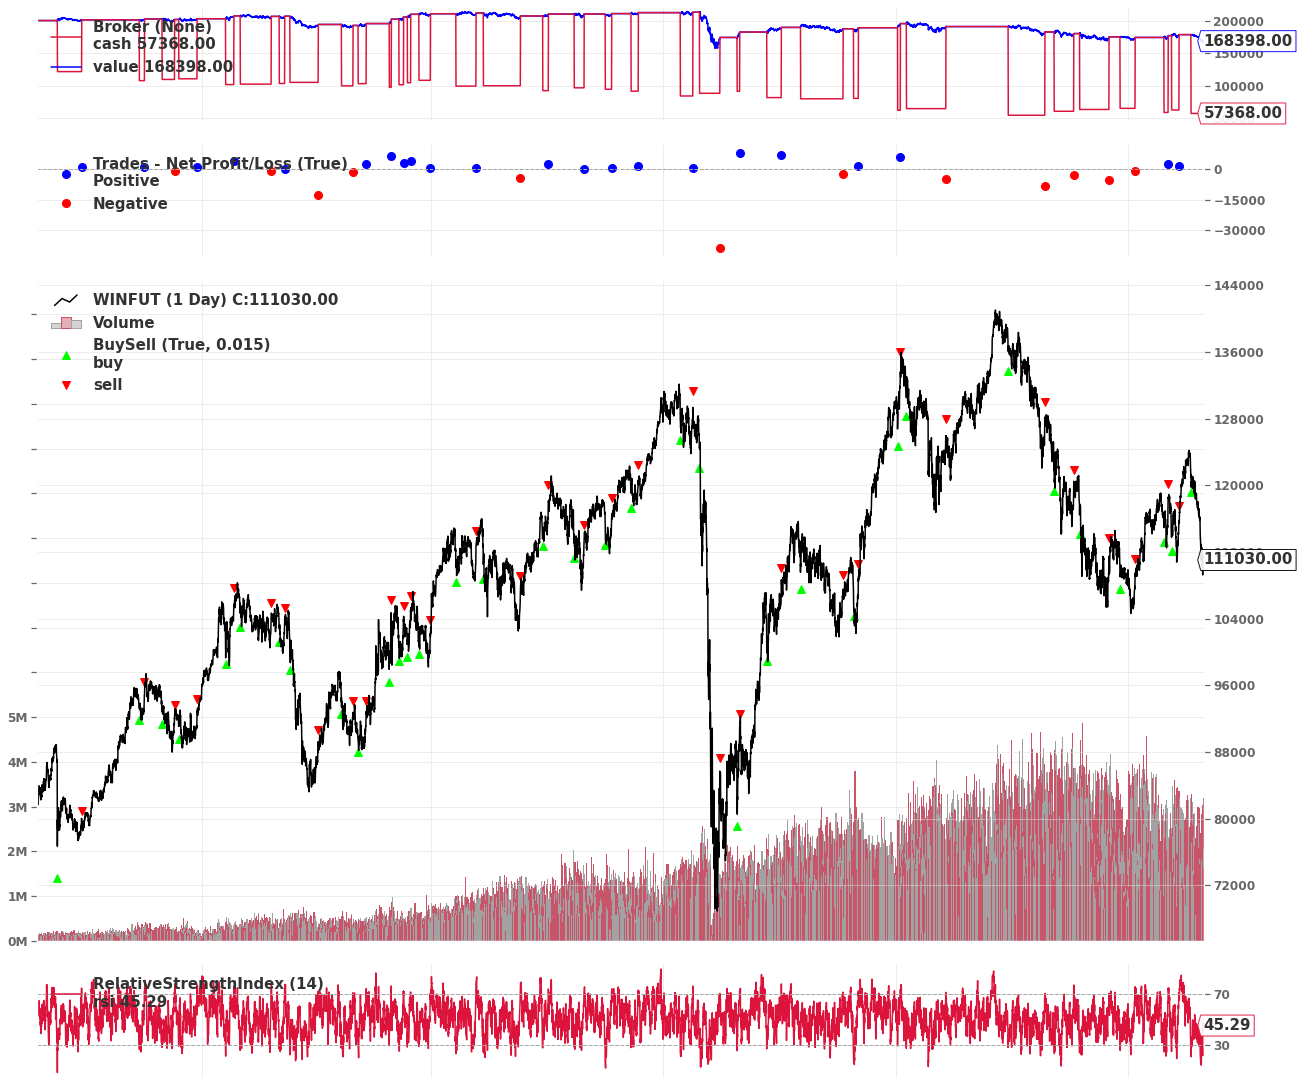

In [ ]:
plt.rcParams['figure.figsize'] = [18, 16]
plt.rcParams.update({'font.size': 15,'font.weight' : 'bold'})

cerebro.plot(plotdist=0.2,subtxtsize=15,fmt_x_data='%Y-%m')

In [ ]:
portfolio_stats = strat.analyzers.getbyname('PyFolio')
returns, positions, transactions, gross_lev = portfolio_stats.get_pf_items()
returns.index = returns.index.tz_convert(None)

In [ ]:
import quantstats

In [ ]:
quantstats.reports.html(returns, output='stats_WINFUT_1day.html', title='CrossoverMM - WINFUT 1day')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
quant_1dia

In [ ]:
cerebro.addwriter(bt.WriterFile, csv=True, out='Backtest_5min.csv')

     |████████████████████████████████| 41 kB 178 kB/s 
     |████████████████████████████████| 6.4 MB 8.6 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
results[0]

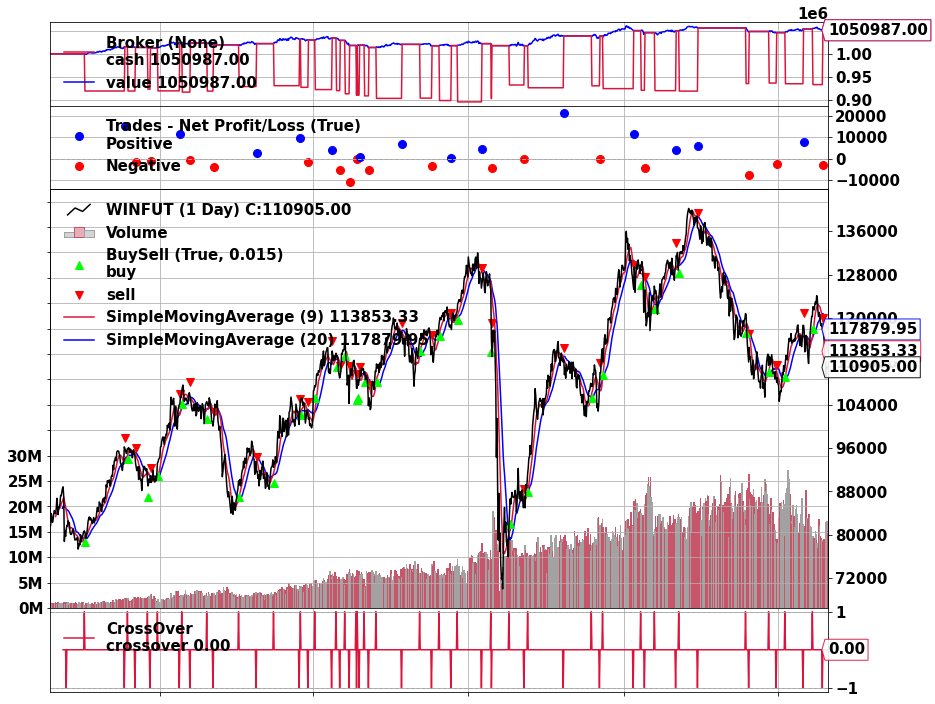

In [ ]:
strats = results[0]